In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

ImportError: cannot import name 'ellipkm1' from 'scipy.special._ufuncs' (unknown location)

In [4]:
df = pd.read_csv("ratings_Electronics.csv",names=["UserId","ProductId","Rating","TimeStamp"])

In [5]:
df.dtypes

UserId        object
ProductId     object
Rating       float64
TimeStamp      int64
dtype: object

In [6]:
df.drop(columns="TimeStamp",axis=1,inplace= True)

In [7]:
df.shape

(7824482, 3)

In [8]:
df.sample(2)

,UserId,ProductId,Rating
3693639,AEVKMUKD531GA,B003YUY57M,2.0
1283238,AATGNDWRF1H34,B000PCF7A6,5.0


In [9]:
df = df[df.groupby('UserId').UserId.transform(len) > 50]


In [10]:
df.shape

(122171, 3)

In [12]:
df.to_csv("product_ratings.csv",index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026907C03B38>]], dtype=object)

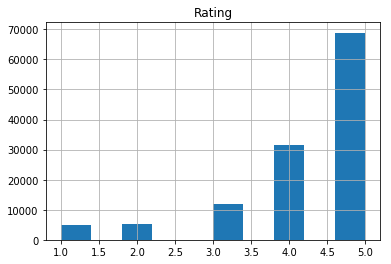

In [2]:
df = pd.read_csv("product_ratings.csv")
df.hist()

In [3]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [4]:
data = Dataset.load_from_df(df[['UserId', 'ProductId', 'Rating']], reader)

In [5]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=7)

In [6]:
from surprise import KNNWithMeans
from surprise import accuracy

In [7]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [8]:
# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1319


1.1319065557264569

In [9]:
testset_new = trainset.build_anti_testset()

In [10]:
testset_new[0:5]

[('A316XO4RWX21YN', 'B00B4GGW5Q', 4.2595058279128653),
 ('A316XO4RWX21YN', 'B001AKC2YG', 4.2595058279128653),
 ('A316XO4RWX21YN', 'B001LF40WW', 4.2595058279128653),
 ('A316XO4RWX21YN', 'B00006346W', 4.2595058279128653),
 ('A316XO4RWX21YN', 'B0074CQUHY', 4.2595058279128653)]

In [15]:
predictions = algo.test(testset_new[0:10000])
predictions[:5]

[Prediction(uid='A316XO4RWX21YN', iid='B00B4GGW5Q', r_ui=4.2595058279128653, est=4.9090909090909092, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A316XO4RWX21YN', iid='B001AKC2YG', r_ui=4.2595058279128653, est=3.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A316XO4RWX21YN', iid='B001LF40WW', r_ui=4.2595058279128653, est=5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A316XO4RWX21YN', iid='B00006346W', r_ui=4.2595058279128653, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A316XO4RWX21YN', iid='B0074CQUHY', r_ui=4.2595058279128653, est=5, details={'actual_k': 0, 'was_impossible': False})]

In [16]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [18]:
predictions_df.columns = ["userId","productId","est_rating"]
predictions_df.sort_values(by = ["userId","productId" ,"est_rating"],ascending=False,inplace=True)

In [19]:
predictions_df.head()

,userId,productId,est_rating
4866,A316XO4RWX21YN,B00LA6T0LS,4.000000
9233,A316XO4RWX21YN,B00L3YHF6O,5.000000
8931,A316XO4RWX21YN,B00L26YDA4,4.400000
6291,A316XO4RWX21YN,B00L2442H0,4.888889
3601,A316XO4RWX21YN,B00L21HC7A,4.909091
